In [ ]:
# default_exp ngrams

# Ngrams

> Explore ngrams in a sequence

## Overview

N-grams are a type of subsequence which consist of n contiguous elements. Exploring n-grams in your data can be especially useful for identifying common behavioural patterns (e.g. wake-up, make breakfast, go to work), and identify less common (outlier) n-grams which may be an interesting feature of your specific data set.
All of the methods below can be accesed via the `ngrams` module.

## Methods

In [1]:
#export
def get_unique_ngrams(sequence, n):
    "Creates a list of all unique ngrams found in a given sequence."
    unique_ngrams = []
    for x in range(len(sequence) -  n + 1):
        this_ngram = sequence[x:x + n]

        if str(this_ngram) not in unique_ngrams:
            unique_ngrams.append(str(this_ngram))

    return [eval(x) for x in unique_ngrams]

In [10]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
get_unique_ngrams(sequence, 3)

[[1, 1, 2],
 [1, 2, 1],
 [2, 1, 2],
 [1, 2, 2],
 [2, 2, 3],
 [2, 3, 1],
 [3, 1, 1],
 [2, 2, 1]]

In [8]:
#export
def get_all_ngrams(sequence, n):
    "Creates a list of all ngrams found in a given sequence."

    all_ngrams = []
    for x in range(len(sequence) -  n + 1):
        this_ngram = sequence[x:x + n]
        all_ngrams.append(this_ngram)

    return all_ngrams

In [9]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
get_all_ngrams(sequence, 3)

[[1, 1, 2],
 [1, 2, 1],
 [2, 1, 2],
 [1, 2, 2],
 [2, 2, 3],
 [2, 3, 1],
 [3, 1, 1],
 [1, 1, 2],
 [1, 2, 2],
 [2, 2, 1],
 [2, 1, 2],
 [1, 2, 2],
 [2, 2, 3],
 [2, 3, 1],
 [3, 1, 1],
 [1, 1, 2]]

In [11]:
#export
def get_ngram_universe(sequence, n):
    "Computes the universe of possible ngrams given a sequence. Where n is equal to the length of the sequence, the resulting number represents the sequence universe."
    # if recurrance is possible, the universe is given by k^t (SSA pg 68)
    k = len(set(sequence))
    if k > 10 and n > 10:
        return 'really big'
    return k**n

In [12]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
get_ngram_universe(sequence, 3)

27

In [14]:
#export
def get_ngram_counts(sequence, n):
    "Computes the prevalence of ngrams in a sequence, returning a dictionary where each key is an ngram, and each value is the number of times that ngram appears in the sequence."

    ngrams = get_unique_ngrams(sequence, n)

    ngram_counts = {str(i):0 for i in ngrams}    

    for x in range(len(sequence) -  n + 1):
        this_ngram = sequence[x:x + n]
        ngram_counts[str(this_ngram)] += 1

    return ngram_counts

In [15]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
get_ngram_counts(sequence, 3)

{'[1, 1, 2]': 3,
 '[1, 2, 1]': 1,
 '[2, 1, 2]': 2,
 '[1, 2, 2]': 3,
 '[2, 2, 3]': 2,
 '[2, 3, 1]': 2,
 '[3, 1, 1]': 2,
 '[2, 2, 1]': 1}

## Plotting

In [20]:
#export
import matplotlib.pyplot as plt
def plot_ngram_counts(sequence, n):
    "Plots the number of occurances of ngrams in a given sequence."

    ngram_counts = get_ngram_counts(sequence, n)
    ngram_counts = {k: ngram_counts[k] for k in sorted(ngram_counts, key=ngram_counts.get)}

    xdata = [key[1:len(key)-1].replace(', ', ', ') for key,value in ngram_counts.items()]
    ydata = [value for key,value in ngram_counts.items()]

    plt.figure()
    plt.barh(xdata, ydata, label=str(n) +'-gram')
    plt.xlabel('Number of Occurances')
    plt.ylabel(str(n) + '-gram')
    plt.gca().yaxis.grid(False)
    plt.legend()
    return plt

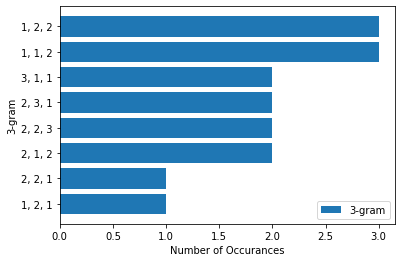

In [21]:
sequence = [1,1,2,1,2,2,3,1,1,2,2,1,2,2,3,1,1,2]
plt = plot_ngram_counts(sequence, 3)
plt.show()